In [17]:
import os
import json
import matplotlib.pyplot as plt
import pickle
import numpy as np
from inDelphi.helpers.nn_logic import nn_match_score_function
from inDelphi.util import init_folders, Filenames, get_data
import inDelphi.neural_network as nn

from inDelphi.neural_network import init_test_set, main_objective
import importlib

def load_json_files(start_dir):
    json_dicts = []
    for dirpath, dirnames, filenames in os.walk(start_dir):
        for filename in filenames:
            if filename == "convert.txt":
                file_path = os.path.join(dirpath, filename)
                with open(file_path, "r") as f:
                    json_dict = json.load(f)
                    json_dicts.append(json_dict)

                    highest_saved = max([int(i.split("_")[0]) for i in list(os.listdir(dirpath + "/parameters"))])

                    json_dict["nn"] = f"{dirpath}/parameters/{highest_saved}_nn.pkl"
                    json_dict["nn2"] = f"{dirpath}/parameters/{highest_saved}_nn2.pkl"

    return json_dicts

def load_pickle_file(r):
    print(r['nn'])
    with open(r['nn'], "rb") as f:
        nn = pickle.load(f)
    with open(r['nn2'], "rb") as f:
        nn2 = pickle.load(f)
    return nn, nn2

a = load_json_files("./experiments")
a = sorted(a, key=lambda x: x['dropout_rate'])
exp_colors = ['green', 'orange', 'blue']

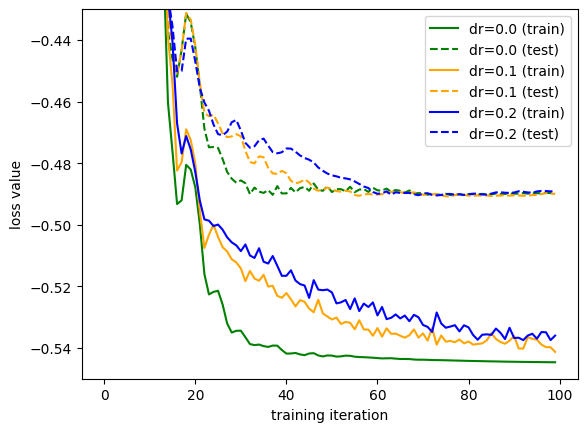

In [18]:
for res, color in zip(a, exp_colors):
    x = list(range(100))
    y = res['training']
    plt.plot(x[0:len(y)], y, label=f"dr={res['dropout_rate']} (train)", color=color)
    y = res['test_no_drop']
    plt.plot(x[0:len(y)], y, "--", label=f"dr={res['dropout_rate']} (test)", color=color)

plt.xlabel("training iteration")
plt.ylabel("loss value")
plt.ylim(-0.55, -0.43)
plt.savefig("inDelphi/figs/training.png")
plt.legend()

./experiments/mshen/prj/mmej_figures/out/d2_model/aac/parameters/99_nn.pkl
out dir: aki
Loading data...


cp: /cluster/mshen/prj/mmej_figures/src//Users/chris/Documents/cse/bio/ml/indelphi-dataprocessinganalysis/inDelphi/util.py: No such file or directory


./experiments/mshen/prj/mmej_figures/out/d2_model/aad/parameters/99_nn.pkl
out dir: akj
Loading data...


cp: /cluster/mshen/prj/mmej_figures/src//Users/chris/Documents/cse/bio/ml/indelphi-dataprocessinganalysis/inDelphi/util.py: No such file or directory


./experiments/mshen/prj/mmej_figures/out/d2_model/aab/parameters/99_nn.pkl
out dir: akk
Loading data...


cp: /cluster/mshen/prj/mmej_figures/src//Users/chris/Documents/cse/bio/ml/indelphi-dataprocessinganalysis/inDelphi/util.py: No such file or directory


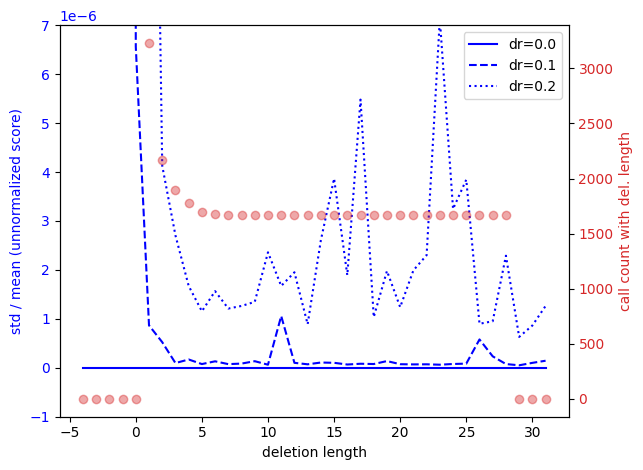

In [129]:
import inDelphi.helpers.nn_logic as nnl

importlib.reload(nnl)

importlib.reload(nn)

fig, ax1 = plt.subplots()

ybegin = -4
yend = 32
x = list(range(ybegin, yend))

freqs_train = [0, 3231, 2170, 1900, 1779, 1695, 1677, 1669, 1666, 1668, 1666, 1667, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 1666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0][0:yend]
freqs_train = [0] * abs(ybegin) + freqs_train

copies = 5000

for res, ls, in list(zip(a, ["-", "--", ":"])):
    data_url, out_place = 'pickle_data/inDelphi_counts_and_deletion_features.pkl', './experiments/mshen/prj/mmej_figures/out/d2_model/'
    nn_params, nn2_params = load_pickle_file(res)
    out_dir, out_letters, out_dir_params, log_fn = init_folders(out_place)
    filenames = Filenames(out_dir, out_letters, out_dir_params, log_fn)

    master_data = get_data(data_url, log_fn)
    INP_train, INP_test, OBS_FREQS_train, OBS_FREQS_test, OBS_FRAC_train, OBS_FRAC_test, NAMES_train, NAMES_test, DEL_LENS_train, DEL_LENS_test = init_test_set(master_data, filenames, res['seed'])

    # scores = np.array([[np.exp(nn_match_score_function(nn2_params, np.array(i), dropout_rate=0.0) - 0.25 * i) for i in x] for _ in range(copies)])
    # scores = np.array([[nn_match_score_function(nn2_params, np.array(i), dropout_rate=res['dropout_rate']) for i in x] for _ in range(copies)])

    means = []
    std = []
    for dl in x:
        scores = [nn_match_score_function(nn2_params, np.array(dl), dropout_rate=res['dropout_rate'])[0] for _ in range(copies)]
        # scores = [(np.exp(s) - 0.25 * dl) for s in scores] # werkt niet voor negatief natuurlijk

        s = np.std(scores)
        m = np.mean(scores)
        std.append(s / abs(m))


    ax1.plot(x, std, ls, label=f"dr={res['dropout_rate']}", color='blue')
    # ax1.errorbar(x, mean_scores.flatten(), ls, label=f"dr={res['dropout_rate']}", yerr=stddev_scores.flatten(), fmt='o')

color = 'blue'
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('deletion length')
ax1.set_ylabel('std / mean (unnormalized score)', color=color)
ax1.set_ylim(-0.000001, 0.000007)
ax1.legend(loc='upper right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('call count with del. length', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
# ax2.ylim(0, 4000)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.scatter(x, freqs_train, color=color, alpha=0.4)

plt.savefig("inDelphi/figs/mh-less_normalized_ds.png")
plt.show()

In [103]:
for i in scores[0][:]:
    print(i)

[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06231915]
[-8.06